# **[DIO-Unimed] Challenge 3**
Developing a Python and Machine Learning model to predict COVDI-19 in Brazil 

In [15]:
#Importing the libraires needed
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


In [16]:
#Importing the database
url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true' #the "?raw=true" is necessary to open the file
df = pd.read_csv(url, parse_dates=['ObservationDate','Last Update']) #those two attributes are dates
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [17]:
#Checking the columns type
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [18]:
#Adjusting the Columns names in order to avoid issues

#Function to replac "/"" and " " for ""(blank) and change the text to lower format 
import re
def adjusting_columns(col_name):
  return re.sub(r"[/| ]","",col_name).lower() 


# Applying the function above on the Dataframe.
#We are using the "df.columns" to create a list and change the values inside it 
df.columns = [adjusting_columns(col) for col in df.columns] 
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [19]:
#Filtering the dataframe in order to work only data related to Brazil with cases confirmed
Brazil= df.loc[
    (df.countryregion=='Brazil')& (df.confirmed > 0)
     ]
Brazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [40]:
#Creating a graph to check the confirmed cases evolution
px.line(Brazil,'observationdate','confirmed',title = 'Confirmed cases in Brazil')

In [20]:
#Creating a new columns in order to see the increasing rate of confirmed cases
Brazil['newcases']=list(map(
    lambda x: 0 if (x==0) else Brazil['confirmed'].iloc[x]-Brazil['confirmed'].iloc[x-1],
    np.arange(Brazil.shape[0])
))
px.line(Brazil,'observationdate','newcases',title='New cases per day')

C:\Users\leovs\AppData\Local\Temp\ipykernel_2520\1255303645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Brazil['newcases']=list(map(


In [42]:
#Creating a graph to see the deaths due to COVID-19 in Brazil
fig=go.Figure()
fig.add_trace(
    go.Scatter(x=Brazil.observationdate,y=Brazil.deaths,name='Deaths',
               mode='lines+markers',line=dict(color='red'))
)
fig.update_layout(title="Deaths due to COVID-19 in Brazil")
fig.show()

In [21]:
#Growth rate
#growth_rate=(current/past)**(1/n)-1

def growth_rate(data,variable,date_start=None,date_end=None):
  #Defining the start date
  if date_start==None:
    date_start=data.observationdate.loc[data[variable] > 0].min()
  else:
    date_start=pd.to_datetime(date_start)
  #Defining the end date
  if date_end==None:
    date_end=data.observationdate.iloc[-1]
  else:
    date_end=pd.to_datetime(date_end)   
  #Defining past and current
  past=data.loc[data.observationdate == date_start,variable].values[0]
  current=data.loc[data.observationdate == date_end, variable].values[0]

  n = (date_end - date_start).days
  rate=(current/past)**(1/n)-1

  return rate*100


In [22]:
#COVID-19 Grow rate in Brazil
growth_rate(Brazil,'confirmed')

16.27183353112116

In [23]:
#Daily growth rate
def daily_growth_rate(data,variable,date_start=None):
  if date_start==None:
    date_start=data.observationdate.loc[data[variable] > 0].min()
  else:
    date_start=pd.to_datetime(date_start)
  #Defining the end date
  date_end=data.observationdate.max()

  n = (date_end - date_start).days

  rate=list(map(
      lambda x: (data[variable].iloc[x]-data[variable].iloc[x-1]) / data[variable].iloc[x-1],
      range(1,n+1)
  ))

  return np.array(rate) *100


In [24]:
#Daily growth rate of confirmed cases in Brazil
first_day=Brazil.observationdate.loc[Brazil.confirmed > 0].min()
px.line(x=pd.date_range(first_day, Brazil.observationdate.max())[1:],
        y=daily_growth_rate, title = 'Daily growth rate of confirmed cases in Brazil'
        )

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'y' is of type str or int.

Predictions

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


In [27]:
Confirmed=Brazil.confirmed
Confirmed.index= Brazil.observationdate
res=seasonal_decompose(Confirmed)

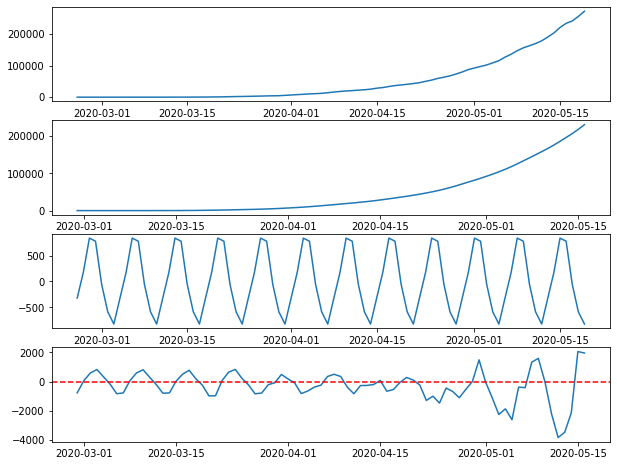

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(Confirmed.index, res.resid)
ax4.axhline(0,linestyle='dashed', color = 'red')

In [33]:
#ARIMA
from pmdarima.arima import auto_arima
model=auto_arima(Confirmed)

In [34]:
fig=go.Figure(go.Scatter(
    x=Confirmed.index,y=Confirmed,name='Observed'
))

fig.add_trace(go.Scatter(
    x=Confirmed.index,y=model.predict_in_sample(), name='Predicted'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=model.predict(31), name='Forecast'
))
fig.update_layout(title='Prediction of confirmed cases in Brazil for the next 30 days')

In [35]:
#Growth model
from prophet import Prophet

In [39]:
train= Confirmed.reset_index()[:-5]
test= Confirmed.reset_index()[-5:]

train.rename(columns={'observationdate':'ds','confirmed':'y'},inplace=True)
test.rename(columns={'observationdate':'ds','confirmed':'y'},inplace=True)

model= Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])
pop=211463256
train['cap']=pop

model.fit(train)

future_dates = model.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  model.predict(future_dates)

12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:18 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predict'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observed - Train'))
fig.update_layout(title='Prediction of confirmed cases in Brazil')
fig.show()